In [13]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor




In [2]:

# Read in the data
df = pd.read_csv("../data/soilify_bihar_training_cleaned.csv")
df.head()

,OC,B11,B12,B4,B8,bai,bsi,slope,LST_Day_1km,elevation
0,0.5,0.34295,0.29280,0.1571,0.23960,28.155871,0.845041,0.584573,15028.93802,65
1,0.5,0.21725,0.11935,0.0808,0.38110,9.664278,0.399940,3.243201,15029.87919,61
2,0.5,0.32180,0.23630,0.1131,0.24680,28.517773,0.723246,0.831567,15030.76218,60
3,0.5,0.27010,0.19210,0.1230,0.23735,31.267565,0.733729,0.935632,15033.97166,56
4,0.5,0.22785,0.15960,0.0992,0.21465,41.810802,0.691516,2.774910,15034.07980,58


## standardise data

In [3]:

#Define the dependent variable
dependent_var = "OC"

# Define the independent variables
independent_vars = list(df.drop(dependent_var, axis=1))


# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the independent variables
scaler.fit(df[independent_vars])

# Transform the independent variables using the scaler
df[independent_vars] = scaler.transform(df[independent_vars])

## Data Split

In [4]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[independent_vars], df[dependent_var], test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1251, 9), (313, 9), (1251,), (313,))

## Linear Regression

In [5]:
# Fit a linear regression model to the training data
lm_model = LinearRegression().fit(X_train, y_train)

# Make predictions on the testing data using the fitted model
lm_predictions = lm_model.predict(X_test)

# Calculate the root mean squared error of the predictions
lm_rmse = mean_squared_error(y_test, lm_predictions, squared=False)

# Calculate the R-squared value of the model
lm_r_squared = lm_model.score(X_test, y_test)

# Print the root mean squared error and R-squared value
print("Linear regression:")
print("RMSE:", lm_rmse)
print("R-squared:", lm_r_squared)

Linear regression:
RMSE: 0.18360544808046847
R-squared: 0.03024555554883057


## Ridge Regression

In [6]:
# Define the hyperparameters for Ridge regression
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100]}

# Perform hyperparameter tuning for Ridge regression using cross-validation
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5).fit(X_train, y_train)

# Make predictions on the testing data using the fitted model
ridge_predictions = ridge_cv.predict(X_test)

# Calculate the root mean squared error and R-squared value of the predictions
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
ridge_r_squared = r2_score(y_test, ridge_predictions)

# Print the root mean squared error and R-squared value for Ridge regression
print("Ridge regression:")
print("Best hyperparameters:", ridge_cv.best_params_)
print("RMSE:", ridge_rmse)
print("R-squared:", ridge_r_squared)


Ridge regression:
Best hyperparameters: {'alpha': 100}
RMSE: 0.18381115986526317
R-squared: 0.028071309914509346


## Lasso Regression

In [7]:
# Define the hyperparameters for Lasso regression
lasso_params = {"alpha": [0.01, 0.1, 1, 10, 100]}

# Perform hyperparameter tuning for Lasso regression using cross-validation
lasso_cv = GridSearchCV(Lasso(), lasso_params, cv=5).fit(X_train, y_train)

# Make predictions on the testing data using the fitted model
lasso_predictions = lasso_cv.predict(X_test)

# Calculate the root mean squared error and R-squared value of the predictions
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
lasso_r_squared = r2_score(y_test, lasso_predictions)

# Print the root mean squared error and R-squared value for Lasso regression
print("Lasso regression:")
print("Best hyperparameters:", lasso_cv.best_params_)
print("RMSE:", lasso_rmse)
print("R-squared:", lasso_r_squared)


Lasso regression:
Best hyperparameters: {'alpha': 0.01}
RMSE: 0.18424199861310378
R-squared: 0.023509722989188075


## Elastic Net Regression

In [8]:
# Define the hyperparameters for Elastic Net regression
elastic_net_params = {"alpha": [0.01, 0.1, 1, 10, 100], "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]}

# Perform hyperparameter tuning for Elastic Net regression using cross-validation
elastic_net_cv = GridSearchCV(ElasticNet(), elastic_net_params, cv=5).fit(X_train, y_train)

# Make predictions on the testing data using the fitted model
elastic_net_predictions = elastic_net_cv.predict(X_test)

# Calculate the root mean squared error and R-squared value of the predictions
elastic_net_rmse = mean_squared_error(y_test, elastic_net_predictions, squared=False)
elastic_net_r_squared = r2_score(y_test, elastic_net_predictions)

# Print the root mean squared error and R-squared value for Elastic Net regression
print("Elastic Net regression:")
print("Best hyperparameters:", elastic_net_cv.best_params_)
print("RMSE:", elastic_net_rmse)
print("R-squared:", elastic_net_r_squared)


Elastic Net regression:
Best hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.3}
RMSE: 0.18379892067467885
R-squared: 0.028200738665648428


## Random Forest Regression

In [9]:
# Define the hyperparameters for Random Forest regression
rf_params = {"n_estimators": [50, 100, 200, 500], "max_depth": [None, 5, 10, 20], "min_samples_split": [2, 5, 10]}

# Perform hyperparameter tuning for Random Forest regression using cross-validation
rf_cv = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5).fit(X_train, y_train)

# Make predictions on the testing data using the fitted model
rf_predictions = rf_cv.predict(X_test)

# Calculate the root mean squared error and R-squared value of the predictions
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r_squared = r2_score(y_test, rf_predictions)

# Print the root mean squared error and R-squared value for Random Forest regression
print("Random Forest regression:")
print("Best hyperparameters:", rf_cv.best_params_)
print("RMSE:", rf_rmse)
print("R-squared:", rf_r_squared)



Random Forest regression:
Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
RMSE: 0.18321860586133268
R-squared: 0.03432764317686321


## SVM Regression

In [10]:
# Define the hyperparameters for Support Vector Machine regression
svm_params = {"C": [0.01, 0.1, 1, 10, 100], "gamma": [0.01, 0.1, 1, 10, 100], "kernel": ["linear", "rbf"]}

# Perform hyperparameter tuning for Support Vector Machine regression using cross-validation
svm_cv = GridSearchCV(SVR(), svm_params, cv=5).fit(X_train, y_train)

# Make predictions on the testing data using the fitted model
svm_predictions = svm_cv.predict(X_test)

# Calculate the root mean squared error and R-squared value of the predictions
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
svm_r_squared = r2_score(y_test, svm_predictions)

# Print the root mean squared error and R-squared value for Support Vector Machine regression
print("Support Vector Machine regression:")
print("Best hyperparameters:", svm_cv.best_params_)
print("RMSE:", svm_rmse)
print("R-squared:", svm_r_squared)


Support Vector Machine regression:
Best hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
RMSE: 0.18519509986958665
R-squared: 0.013380638402137657


## Nueral Network

In [14]:
# Define the function to create the neural network model

def create_model(neurons=1, optimizer="adam"):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], kernel_initializer="normal", activation="relu"))
    model.add(Dense(1, kernel_initializer="normal"))
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    return model

# Define the hyperparameters for the neural network model
nn_params = {"neurons": [1, 5, 10, 15, 20], "optimizer": ["adam", "sgd", "rmsprop"]}

# Create a KerasRegressor object
nn_model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# Perform hyperparameter tuning for the neural network model using cross-validation
nn_cv = GridSearchCV(nn_model, nn_params, cv=5).fit(X_train, y_train)

# Make predictions on the testing data using the fitted model
nn_predictions = nn_cv.predict(X_test)

# Calculate the root mean squared error and R-squared value of the predictions
nn_rmse = mean_squared_error(y_test, nn_predictions, squared=False)
nn_r_squared = r2_score(y_test, nn_predictions)

# Print the root mean squared error and R-squared value for the neural network model
print("Neural network regression:")
print("RMSE:", nn_rmse)
print("R-squared:", nn_r_squared)
print("Best hyperparameters:", nn_cv.best_params_)

/tmp/ipykernel_485/2526016759.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)


Neural network regression:
RMSE: 0.18333726189275235
R-squared: 0.03307646072139914
Best hyperparameters: {'neurons': 20, 'optimizer': 'sgd'}


## Results

In [15]:
results = pd.DataFrame({"Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Elastic Net Regression", "Random Forest Regression", "Support Vector Machine Regression", "Neural Network"],
                        "RMSE": [lm_rmse, ridge_rmse, lasso_rmse, elastic_net_rmse, rf_rmse, svm_rmse, nn_rmse],
                        "R-squared": [lm_r_squared, ridge_r_squared, lasso_r_squared, elastic_net_r_squared, rf_r_squared, svm_r_squared, nn_r_squared]})
results.sort_values("R-squared", ascending=False)


,Model,RMSE,R-squared
4,Random Forest Regression,0.183219,0.034328
6,Neural Network,0.183337,0.033076
0,Linear Regression,0.183605,0.030246
3,Elastic Net Regression,0.183799,0.028201
1,Ridge Regression,0.183811,0.028071
2,Lasso Regression,0.184242,0.023510
5,Support Vector Machine Regression,0.185195,0.013381


### R-Squared Comparison

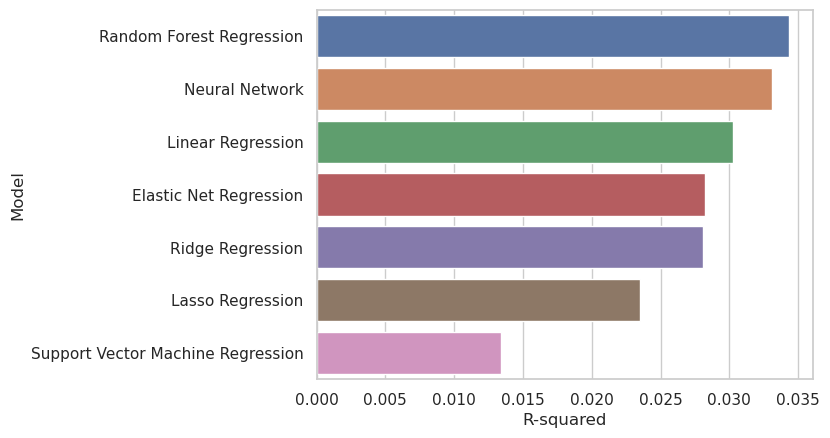

In [16]:
# plot r2 in ascending order
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="R-squared", y="Model", data=results.sort_values("R-squared", ascending=False))
plt.show()

### Actual v/s Predicted charts

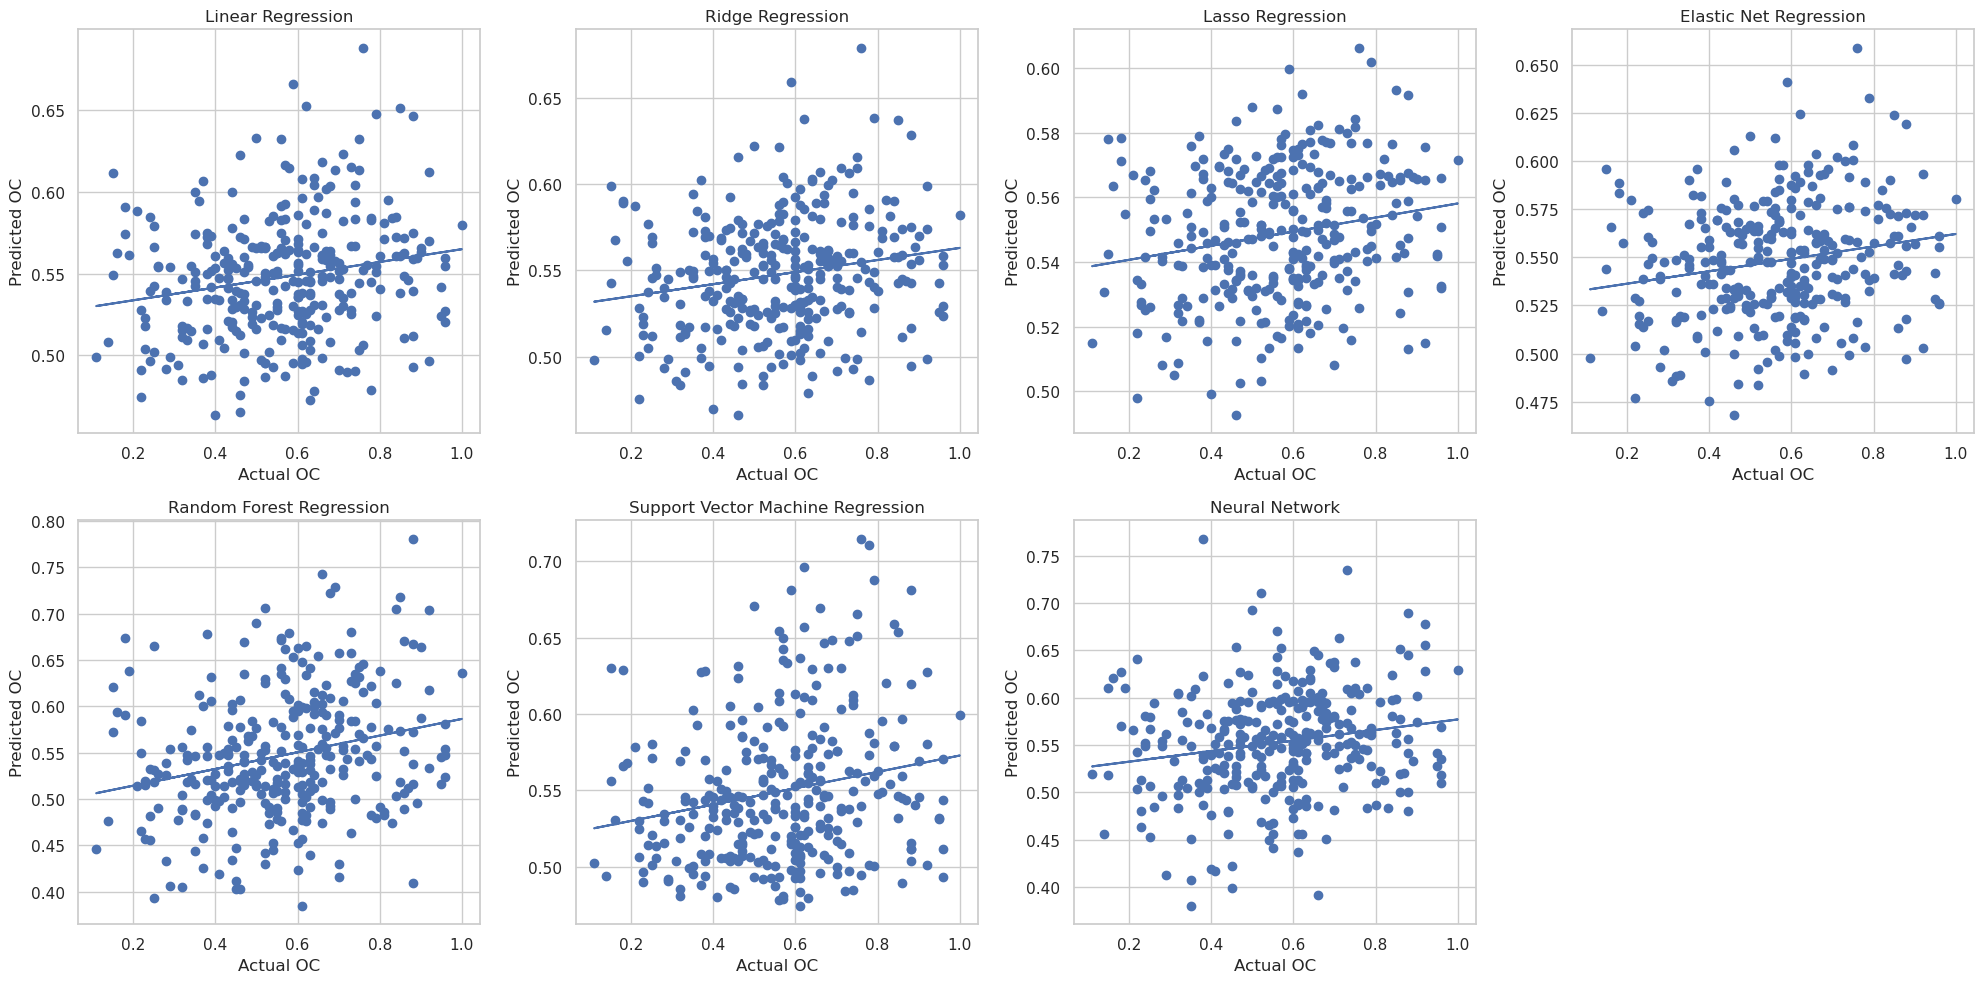

In [26]:
# Create a 2x4 grid for plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Create the plots for the first 7 models
plot_actual_vs_predicted("Linear Regression", y_test, lm_predictions, axes[0, 0])
plot_actual_vs_predicted("Ridge Regression", y_test, ridge_predictions, axes[0, 1])
plot_actual_vs_predicted("Lasso Regression", y_test, lasso_predictions, axes[0, 2])
plot_actual_vs_predicted("Elastic Net Regression", y_test, elastic_net_predictions, axes[0, 3])
plot_actual_vs_predicted("Random Forest Regression", y_test, rf_predictions, axes[1, 0])
plot_actual_vs_predicted("Support Vector Machine Regression", y_test, nn_predictions, axes[1, 1])
plot_actual_vs_predicted("Neural Network", y_test, svm_predictions, axes[1, 2])

# Hide the 8th and 9th subplots
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()
